# Debug pAAG51 + RBS cloning
I'm having trouble cloning an RBS into pAAG51, which is a part plasmid that contains the promoter.

## Jan 19, 2017 (Thursday)

Setup PCR reactions for making `rfp liu` and inserting and RBS into pAAG51:

In [1]:
!../protocols/general/pcr_cloning.py 2

1. Prepare each 10x primer mix:

   Reagent           Conc  Each Rxn
   ────────────────────────────────
   water                   38.00 μL
   forward primer  200 μM   1.00 μL
   reverse primer  200 μM   1.00 μL
   ────────────────────────────────
                           40.00 μL

2. Setup 2 PCR reactions and 1 negative control:

   Reagent             Conc  Each Rxn  Master Mix
   ──────────────────────────────────────────────
   water                      9.50 μL    28.50 μL
   primer mix           10x   2.50 μL            
   template DNA   100 pg/μL   0.50 μL     1.50 μL
   Q5 master mix         2x  12.50 μL    37.50 μL
   ──────────────────────────────────────────────
                             25.00 μL    22.50 μL/rxn

3. Run the following thermocycler protocol:

   98°C → 98°C → 62°C → 72°C → 72°C → 12°C
   0:30   0:10   0:20   2:00   2:00    ∞
         └──────────────────┘
                  35x

4. Setup 2 ligation reactions:

   Reagent                Conc  Each Rxn  Mas

The `rfp liu` PCR seemed to work fine.  The RBS PCR looks like a primer dimer was amplified.  That's weird, because the primers are not predicted to dimerize at all, are not predicted to misprime at all, and are also not especially long or GC rich.

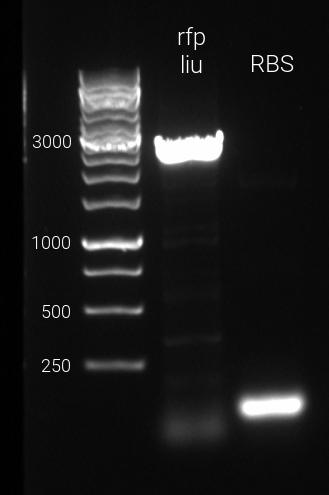

In [6]:
from IPython.display import Image
Image('../data/gels/20170119_rfp_liu_and_rbs_pcr_annotated.png', width=200)

## Jan 20, 2017 (Friday)

I'm going to try running a $T_a$ gradient and adding 5% DMSO, just to see if I can get some product.  The recommended $T_a$ for the primers James designed (accoring to the NEB tool) is 57°C, and yesterday I ran the reaction at 62°C.  Today I will try a 55°C to 65°C gradient.

In [9]:
!../protocols/general/pcr.py 8 -v 10

1. Prepare each 10x primer mix:

   Reagent           Conc  Each Rxn
   ────────────────────────────────
   water                   38.00 μL
   forward primer  200 μM   1.00 μL
   reverse primer  200 μM   1.00 μL
   ────────────────────────────────
                           40.00 μL

2. Setup 8 PCR reactions and 1 negative control:

   Reagent             Conc  Each Rxn  Master Mix
   ──────────────────────────────────────────────
   water                      3.80 μL    34.20 μL
   primer mix           10x   1.00 μL            
   template DNA   100 pg/μL   0.20 μL     1.80 μL
   Q5 master mix         2x   5.00 μL    45.00 μL
   ──────────────────────────────────────────────
                             10.00 μL     9.00 μL/rxn

3. Run the following thermocycler protocol:

   98°C → 98°C → 62°C → 72°C → 72°C → 12°C
   0:30   0:10   0:20   2:00   2:00    ∞
         └──────────────────┘
                  35x


I overran this gel, so I don't know if there are bands at ~100bp for the +DMSO condition, but it looks like adding 5% DMSO is the trick.  I'm going to try transforming the DNA from the 4th lane from the left (61.3°C).  If I ever need to do this PCR in the future, I think 62°C is the best $T_a$.  Also, it looks like 10 μL PCR reactions work fine, so maybe I'll want to update my inverse PCR protocol to use less material.

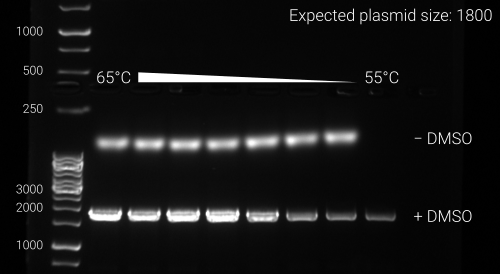

In [15]:
Image('../data/gels/annotated/20170120_rbs_pcr_optimization.png')

In [14]:
!../protocols/general/pcr_cloning.py 1 --skip-pcr

1. Setup 1 ligation reaction:

   Reagent                Conc  Each Rxn
   ─────────────────────────────────────
   water                        13.50 μL
   T4 ligase buffer        10x   2.00 μL
   T4 PNK              10 U/μL   0.50 μL
   T4 DNA ligase      400 U/μL   0.50 μL
   DpnI                20 U/μL   0.50 μL
   PCR product       ≈50 ng/μL   3.00 μL
   ─────────────────────────────────────
                                20.00 μL

   - Incubate at room temperature for 1h.

2. Transform the ligated DNA into Top10 cells.

3. Pick individual colonies to grow overnight in 5 mL 
   selective media.

4. Miniprep the overnight culture to isolate pure 
   plasmid and send it for sequencing.  Store the 
   remaining DNA at -20°C.


I plated the cells and left the plate on my bench (covered in foil) over the weekend.

## Jan 23, 2017 (Monday)

I got sequencing results back for `rfp liu`.  3 of 4 plasmids were correct, so probably ordering primers with a lower $T_a$ was the key.